## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("QueryResults.csv", names=["DATE", "LANG", "POST"], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
print(df.head())
print(df.tail())

                  DATE        LANG  POST
0  2008-07-01 00:00:00          c#     3
1  2008-08-01 00:00:00    assembly     8
2  2008-08-01 00:00:00  javascript   162
3  2008-08-01 00:00:00           c    85
4  2008-08-01 00:00:00      python   124
                     DATE   LANG  POST
1986  2020-07-01 00:00:00      r  5694
1987  2020-07-01 00:00:00     go   743
1988  2020-07-01 00:00:00   ruby   775
1989  2020-07-01 00:00:00   perl   182
1990  2020-07-01 00:00:00  swift  3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
print(df.columns)
print(df["DATE"].count())
print(df["LANG"].count())
print(df["POST"].count())

Index(['DATE', 'LANG', 'POST'], dtype='object')
1991
1991
1991


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
df.groupby("LANG").sum()

,POST
LANG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [7]:
print(df.groupby("LANG")["DATE"].count())
print(df.groupby("LANG").DATE.count())

LANG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
Name: DATE, dtype: int64
LANG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
Name: DATE, dtype: int64


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
from datetime import datetime
date_pandas = df['DATE']
date_python = [date.split(" ")[0] for date in date_pandas]
date_object = [datetime.strptime(date.split(" ")[0], '%Y-%m-%d') for date in date_pandas]
date_date = [object.date() for object in date_object]
print(date_date[0])

2008-07-01


In [ ]:
print(df["DATE"])
print(df.DATE)

0       2008-07-01 00:00:00
1       2008-08-01 00:00:00
2       2008-08-01 00:00:00
3       2008-08-01 00:00:00
4       2008-08-01 00:00:00
               ...         
1986    2020-07-01 00:00:00
1987    2020-07-01 00:00:00
1988    2020-07-01 00:00:00
1989    2020-07-01 00:00:00
1990    2020-07-01 00:00:00
Name: DATE, Length: 1991, dtype: object
0       2008-07-01 00:00:00
1       2008-08-01 00:00:00
2       2008-08-01 00:00:00
3       2008-08-01 00:00:00
4       2008-08-01 00:00:00
               ...         
1986    2020-07-01 00:00:00
1987    2020-07-01 00:00:00
1988    2020-07-01 00:00:00
1989    2020-07-01 00:00:00
1990    2020-07-01 00:00:00
Name: DATE, Length: 1991, dtype: object


In [9]:
df.DATE = pd.to_datetime(df.DATE)
df.DATE

0      2008-07-01
1      2008-08-01
2      2008-08-01
3      2008-08-01
4      2008-08-01
          ...    
1986   2020-07-01
1987   2020-07-01
1988   2020-07-01
1989   2020-07-01
1990   2020-07-01
Name: DATE, Length: 1991, dtype: datetime64[ns]

## Data Manipulation



In [10]:
print(df.shape)
print(df.columns)
print(df.head())

(1991, 3)
Index(['DATE', 'LANG', 'POST'], dtype='object')
        DATE        LANG  POST
0 2008-07-01          c#     3
1 2008-08-01    assembly     8
2 2008-08-01  javascript   162
3 2008-08-01           c    85
4 2008-08-01      python   124


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [11]:
df.shape

(1991, 3)

In [12]:
print(df.columns)
print(df.head())

Index(['DATE', 'LANG', 'POST'], dtype='object')
        DATE        LANG  POST
0 2008-07-01          c#     3
1 2008-08-01    assembly     8
2 2008-08-01  javascript   162
3 2008-08-01           c    85
4 2008-08-01      python   124


In [13]:
df.isna().values.any()

False

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [14]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [15]:
pivoted_df = test_df.pivot(index="Age", columns="Actor", values="Power")
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [16]:
reshaped_df = df.pivot(index="DATE", columns="LANG", values="POST")
print(reshaped_df.shape)
print(reshaped_df.head())
print(reshaped_df.tail())
print(reshaped_df.columns)
print(reshaped_df.count())
print(reshaped_df.isna().values.any())
reshaped_df.fillna(value=0, inplace=True)
print(reshaped_df.count())
print(reshaped_df.head())
print(reshaped_df.tail())
reshaped_df.isna().values.any()

(145, 14)
LANG        assembly      c      c#    c++  ...  python    r   ruby  swift
DATE                                        ...                           
2008-07-01       NaN    NaN     3.0    NaN  ...     NaN  NaN    NaN    NaN
2008-08-01       8.0   85.0   511.0  164.0  ...   124.0  NaN   73.0    NaN
2008-09-01      28.0  321.0  1649.0  755.0  ...   542.0  6.0  290.0    NaN
2008-10-01      15.0  303.0  1989.0  811.0  ...   510.0  NaN  249.0    NaN
2008-11-01      17.0  259.0  1730.0  735.0  ...   452.0  1.0  160.0    NaN

[5 rows x 14 columns]
LANG        assembly       c       c#     c++  ...   python       r   ruby   swift
DATE                                           ...                                
2020-03-01     317.0  2670.0   8954.0  5107.0  ...  26673.0  5761.0  780.0  3434.0
2020-04-01     406.0  3472.0  10042.0  6820.0  ...  32605.0  7047.0  860.0  4015.0
2020-05-01     386.0  3602.0   9923.0  7063.0  ...  34478.0  6833.0  774.0  4066.0
2020-06-01     363.0  2757.

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

<function matplotlib.pyplot.show>

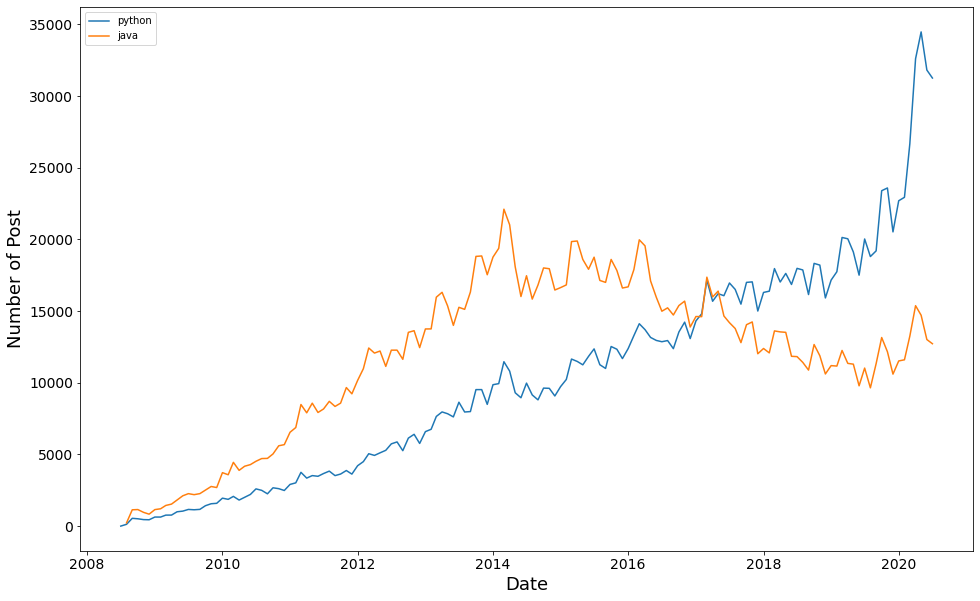

In [17]:
xpoints_python = df.loc[df["LANG"] == "python", "DATE"]
ypoints_python = df.loc[df["LANG"] == "python", "POST"]
xpoints_java = df.loc[df["LANG"] == "java", "DATE"]
ypoints_java = df.loc[df["LANG"] == "java", "POST"]
xpoints_go = df.loc[df["LANG"] == "go", "DATE"]
ypoints_go = df.loc[df["LANG"] == "go", "POST"]
xpoints_javascript = df.loc[df["LANG"] == "javascript", "DATE"]
ypoints_javascript = df.loc[df["LANG"] == "javascript", "POST"]
xpoints_ruby = df.loc[df["LANG"] == "ruby", "DATE"]
ypoints_ruby = df.loc[df["LANG"] == "ruby", "POST"]
xpoints_php = df.loc[df["LANG"] == "php", "DATE"]
ypoints_php = df.loc[df["LANG"] == "php", "POST"]
xaxis_python = reshaped_df.index
yaxis_python = reshaped_df.python
xaxis_java = reshaped_df.index
yaxis_java = reshaped_df.java
xaxis_go = reshaped_df.index
yaxis_go = reshaped_df.go
xaxis_javascript = reshaped_df.index
yaxis_javascript = reshaped_df.javascript
xaxis_ruby = reshaped_df.index
yaxis_ruby = reshaped_df.ruby
xaxis_php = reshaped_df.index
yaxis_php = reshaped_df.php

plt.figure(figsize=(16, 10))
plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Post", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(xaxis_python, yaxis_python, label="python")
plt.plot(xpoints_java, ypoints_java, label="java")
plt.legend()
plt.show

<function matplotlib.pyplot.show>

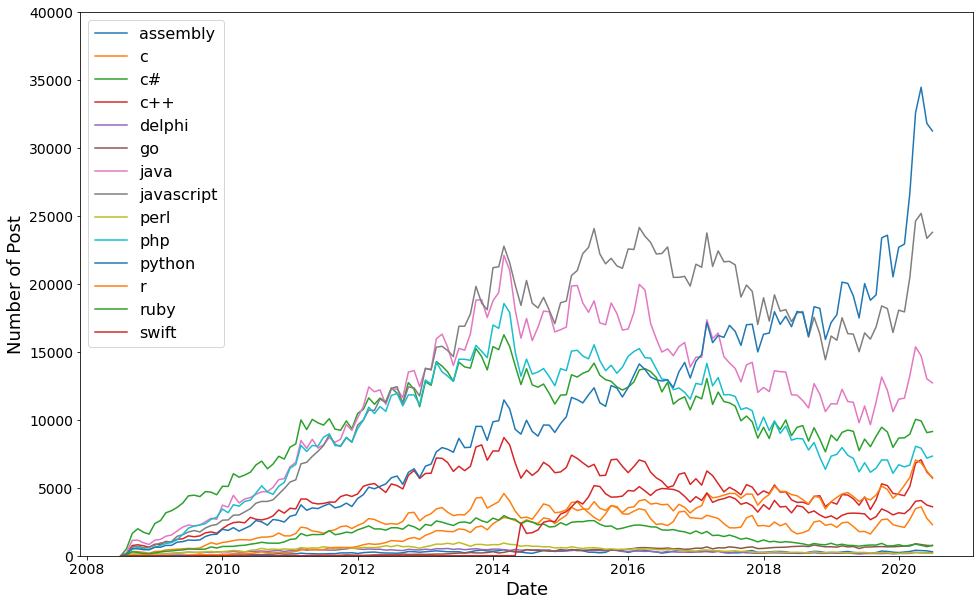

In [18]:
plt.figure(figsize=(16, 10))
plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Post", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 40000)
for language in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[language], label=reshaped_df[language].name)
plt.legend(fontsize=16)
plt.show

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

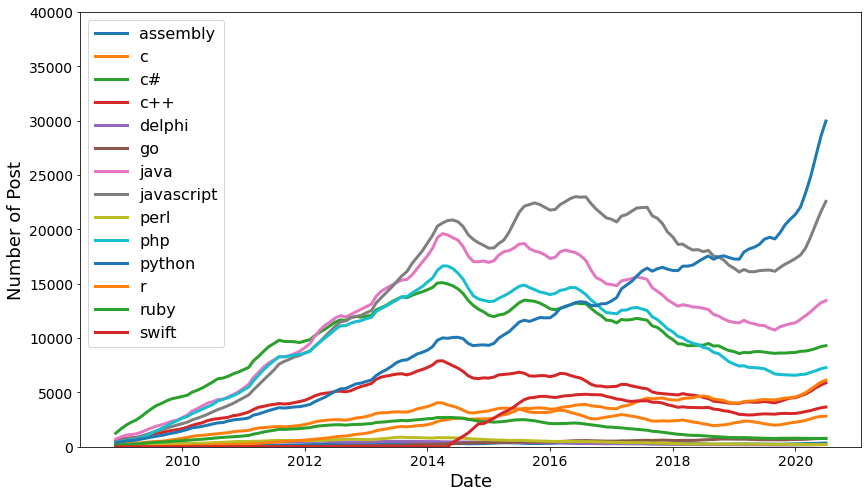

In [26]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(14, 8))
plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Post", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 40000)

for language in roll_df.columns:
  plt.plot(roll_df.index, roll_df[language], label=roll_df[language].name, linewidth=3)

plt.legend(fontsize=16)
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 